# Data Visualizations with Python


- General Matplotlib Tips
- Simple Line Plots
- Simple Scatter Plots
- Histograms, Binnings, and Density
- Customizing Plot Legends
- Multiple Subplots
- Customizing Matplotlib: Stylesheets
- Visualization with Seaborn Library
- Hands on Practice: Exploring Marathon Finishing Times

We are going to learn about the Matplotlib package for visualization in Python. Matplotlib is a multi-platform data visualization library built on NumPy arrays. Matplotlib works well with many operating systems and graphics backends. It also supports many different output types. It has a large user base within the data analytics Python world. Even though newer tools such as ggplota and D3js gained momentum, Matplotlib offers us a well-tested, stable cross-platform graphics engine in Python. Recent Matplotlib versions make it relatively easy to set new global plotting styles. New packages were built on its powerful internals to drive Matplotlib via cleaner, more modern APIs such as Seaborn libray. 

## General Matplotlib Tips

Before we dive into the details of creating visualizations with Matplotlib, there are a few useful things you should know about using the package.

### Importing Matplotlib

Just as we use the ``np`` shorthand for NumPy and the ``pd`` shorthand for Pandas, we will use some standard shorthands for Matplotlib imports. The ``plt`` interface is what we will use most often:

In [0]:
import matplotlib.pyplot as plt

### Setting Styles

We will use the ``plt.style`` directive to choose appropriate  styles for our figures. Here we will set the ``classic`` style, which ensures that the plots we create use the classic Matplotlib style:

In [0]:
plt.style.use('classic')

You can refer to the following resource(s) for different style types in Matplotlib: 
- https://tonysyu.github.io/raw_content/matplotlib-style-gallery/gallery.html
- https://python-graph-gallery.com/199-matplotlib-style-sheets/

#### Plotting within a Jupyter notebook

We can plot interactively within a Jupyter notebook with the ``%matplotlib`` command. We can also embed graphics directly in the notebook using the following two options:

- ``%matplotlib notebook`` will lead to *interactive* plots embedded within the notebook
- ``%matplotlib inline`` will lead to *static* images of your plot embedded in the notebook

We will generally opt for ``%matplotlib inline`` in our scripts:

In [0]:
%matplotlib inline

It is enought to run ``%matplotlib inline``  command only once per session in our notebook. After running this command, any cell within the notebook that creates a plot will embed a PNG image of the resulting graphic.

### Saving Figures to File

We can save figures in many different formats using the ``savefig()`` command. For example, we can create a figure object fig and save it as a PNG file as follows:

In [0]:
import numpy as np
x = np.linspace(0, 10, 100)

fig = plt.figure()
plt.plot(x, np.sin(x), '--')
plt.plot(x, np.cos(x), '+');

In [0]:
fig.savefig('my_figure.png')

We can use the IPython Image object to display the contents of this file as follows:

In [0]:
from IPython.display import Image
Image('my_figure.png')

We can easily download this image file on our local devices from Google Colab environment using the following commands:

In [0]:
from google.colab import files
files.download("my_figure.png")

# Simple Line Plots

Let us start by setting up our notebook for plotting and importing the packages we are going to use:

In [0]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import numpy as np

For all Matplotlib plots, we start by creating a figure and an axes. In Matplotlib, the figure is an instance of the class plt.Figure. We can consider it as a single container containing all the objects representing axes, graphics, text, and labels.  We commonly use the variable name fig to refer to a figure instance.The axes is an instance of the class plt.Axes. It is simply a bounding box with ticks and labels, which will eventually contain the plot elements that make up our visualization.   We commonly use the variable name ax to refer to an axes instance or group of axes instances. Once we have created an axes, we can use the ax.plot function to plot some data. 

In [0]:
# plotting a simple sinusoid:
fig = plt.figure()
ax = plt.axes()

x = np.linspace(0, 10, 100)
ax.plot(x, np.sin(x));

Alternatively, we can use ``plot`` function directly on ``plt`` object to let the figure and axes be created for us in the background automatically:

In [0]:
plt.plot(x, np.sin(x));

To create a single figure plot with multiple line plots in it, we can simply call the ``plot`` function multiple times. For example, the following will plot y = x and y = x + 2 line plots in the same figure:

In [0]:
plt.plot(x, x)
plt.plot(x, x + 2)

## Line Colors and Styles

The ``plt.plot()`` function takes additional arguments that can be used to specify line color and styles. You can use the ``color`` keyword to adjust the line color, which accepts a string argument representing color of your choice. If no color is specified, Matplotlib will automatically cycle through a set of default colors for multiple lines. The color can be specified in a variety of ways:

In [0]:
plt.plot(x, x, color='blue')            # specify color by name
plt.plot(x, x + 1, color='#FFDD44')     # Hex code (RRGGBB from 00 to FF)
plt.plot(x, x + 2, color=(1.0,0.2,0.3)) # RGB tuple, values 0 to 1
plt.plot(x, x + 3, color='chartreuse'); # all HTML color names supported



You can adjust the line style using the ``linestyle`` keyword:

In [0]:
plt.plot(x, x + 0, linestyle='solid')
plt.plot(x, x + 1, linestyle='dashed')
plt.plot(x, x + 2, linestyle='dashdot')
plt.plot(x, x + 3, linestyle='dotted');

# Alternatively, you can use the following equivalent short codes:
plt.plot(x, x + 4, linestyle='-')  # solid
plt.plot(x, x + 5, linestyle='--') # dashed
plt.plot(x, x + 6, linestyle='-.') # dashdot
plt.plot(x, x + 7, linestyle=':');  # dotted

## Axes Limits



Matplotlib provides default axes limits for your plots. However, you may control axis limits of your plots using the ``plt.xlim()`` and ``plt.ylim()`` methods:

In [0]:
plt.plot(x, x/2)

plt.xlim(-1, 10)
plt.ylim(-1, 6);

Alternatively, the ``plt.axis()`` method allows you to set the ``x`` and ``y`` limits with a single call, by passing a list which specifies ``[xmin, xmax, ymin, ymax]``:

In [0]:
plt.plot(x, x/2)
plt.axis([-1, 10, -1, 6]);

## Labeling Plots

You can also adjst titles, axis labels, and simple legends in your plots.

In [0]:
plt.plot(x, x+2)
plt.title("A Linear Line y = x + 2")
plt.xlabel("x")
plt.ylabel("y");

The position, size, and style of these labels can be adjusted using optional arguments to the function. For more information, see the Matplotlib documentation (https://matplotlib.org/3.2.0/contents.html#)

When multiple lines are being shown within a single axes, you can create a plot legend that labels each line type using plt.legend() method. You can specify the label of each line using the label keyword of the plot function:

In [0]:
plt.plot(x, x, color='blue', label= 'y=x')   
plt.plot(x, x+2, color='green', label= 'y=x+2')   
plt.legend();

# Simple Scatter Plots

Another commonly used plot type is the simple scatter plot. Instead of points being joined by line segments, the points in scatter plots are represented individually with a dot, circle, or other shape. Let start by setting up the notebook for plotting and importing the functions we will use:


In [0]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import numpy as np

## Scatter Plots with ``plt.plot``

``plt.plot`` function in Matplotlib can produce line plots as well as scatter plots.

In [0]:
x = np.linspace(0, 10, 30)
y = np.sin(x)

plt.plot(x, y, 'o', color='black');

The third argument in the above function call is a character that represents the type of symbol used for the plotting.
Some choices are: ``'-'``, ``'--'``,  ``'+'``, ``'o'``. The full list of available symbols can be seen in the documentation of ``plt.plot``, or in Matplotlib's online documentation. Most of the possibilities are fairly intuitive, and we'll show a number of the more common ones here:

In [0]:
rng = np.random.RandomState(0)
for marker in ['o', '.', ',', 'x', '+', 'v', '^', '<', '>', 's', 'd']:
    plt.plot(rng.rand(5), rng.rand(5), marker,
             label="marker='{0}'".format(marker))
plt.legend()
plt.xlim(0, 1.8);

## Scatter Plots with ``plt.scatter``

Alternatively, you can create scatter plots using the ``plt.scatter`` function, which can be used very similarly to the ``plt.plot`` function:

In [0]:
x = np.linspace(0, 10, 30)
y = np.sin(x)

plt.scatter(x, y, marker='o', color='black');

The primary difference of ``plt.scatter`` from ``plt.plot`` is that it can be used to create scatter plots where the properties of each individual point (size, face color, edge color, etc.) can be individually controlled or mapped to data.

Let's show this by creating a random scatter plot with points of many colors and sizes. In order to better see the overlapping results, we'll also use the ``alpha`` keyword to adjust the transparency level:

In [0]:
rng = np.random.RandomState(0)
x = rng.randn(100)
y = rng.randn(100)
colors = rng.rand(100)
sizes = 1000 * rng.rand(100)

plt.scatter(x, y, c=colors, s=sizes, alpha=0.3, cmap='viridis')
plt.colorbar();  # to show color scale on the right column.

It is important to notice that the color argument is automatically mapped to a color scale on the right column, and that the size argument is given in pixels. In this way, the color and size of points can be used to convey information in the visualization, in order to visualize multidimensional data.


Aside from the different features available in ``plt.plot`` and ``plt.scatter``, why might you choose to use one over the other? While it doesn't matter as much for small amounts of data, as datasets get larger than a few thousand points, ``plt.plot`` can be noticeably more efficient than ``plt.scatter``. For large datasets, the difference between these two can lead to vastly different performance, and for this reason, ``plt.plot`` should be preferred over ``plt.scatter`` for large datasets.


# Histograms, Binnings, and Density

A simple histogram can be a great first step in understanding a dataset. Matplotlib's histogram function comes very handy in creating a basic histogram.

In [0]:
# Let us import our boiler-plate
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')

# Let us generate some random data
data = np.random.randn(1000)

In [0]:
# Let us plot histogram of our randomly generated data
plt.hist(data);

The ``hist()`` function offers many customization options on calculation and display. Here is an example of a customized histogram:

In [0]:
plt.hist(data, bins=30, alpha=0.5, histtype='stepfilled', density = True, color='steelblue', edgecolor='none');

You may find it useful to combine``histtype='stepfilled'`` along with some transparency ``alpha`` value when comparing histograms of several distributions. For example,

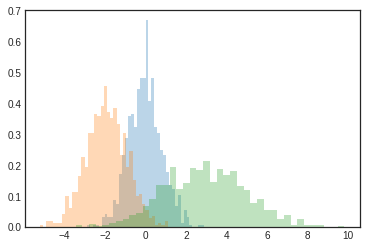

In [84]:
# Let us generate three sets of normally distributed data
x1 = np.random.normal(0, 0.8, 1000)
x2 = np.random.normal(-2, 1, 1000)
x3 = np.random.normal(3, 2, 1000)

# Let us create a dictionary of our customization settings
kwargs = dict(histtype='stepfilled', alpha=0.3, density=True, bins=40)

# Let us plot each histogram using the customized settings to compare them
plt.hist(x1, **kwargs)
plt.hist(x2, **kwargs)
plt.hist(x3, **kwargs);

# Customizing Plot Legends

Plot legends give meaning to a data visualization, assigning meaning to the various plot elements.
We previously saw how to create a simple legend; here we'll take a look at customizing the placement and aesthetics of the legend in Matplotlib. The simplest legend can be created with the ``plt.legend()`` command, which automatically creates a legend for any labeled plot elements:

In [0]:
# Importing our boiler plate
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('classic')
%matplotlib inline

In [0]:
# creating our numpy array as a dataset using linspace() function
x = np.linspace(0, 10, 1000)

# creating two plots using our generated dataset
fig, ax = plt.subplots()
ax.plot(x, np.sin(x), linestyle = '-', color ='blue', label='Sine')
ax.plot(x, np.cos(x), linestyle = '--', color = 'red', label='Cosine')
ax.axis('equal')

# incorporating the legend for each plot
leg = ax.legend();

We can customize legends in our plots. For example, we can specify its location and turn off the frame around it:

In [0]:
ax.legend(loc='upper left', frameon=False)
fig

We can use a rounded box (``fancybox``) or add a shadow, change the transparency (alpha value) of the frame, or change the padding around the text. For example,

In [0]:
ax.legend(fancybox=True, framealpha=1, shadow=True, borderpad=1)
fig

## Legend for Size of Points


Sometimes the legend defaults are not sufficient for the given visualization.
For example, perhaps you're be using the size of points to mark certain features of the data, and want to create a legend reflecting this.
Here is an example where we'll use the size of points to indicate populations of California cities.
We'd like a legend that specifies the scale of the sizes of the points, and we'll accomplish this by plotting some labeled data with no entries

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  if sys.path[0] == '':


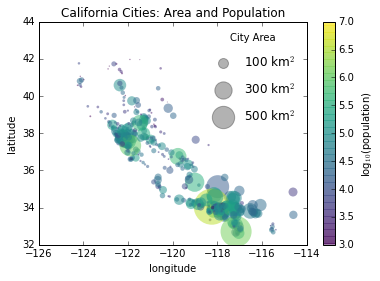

In [103]:
# Read the data from an external server into Pandas DataFrame
import pandas as pd
cities = pd.read_csv('https://raw.githubusercontent.com/jakevdp/PythonDataScienceHandbook/master/notebooks/data/california_cities.csv')

# Extract the data we're interested in from the DataFrame
lat, lon = cities['latd'], cities['longd']
population, area = cities['population_total'], cities['area_total_km2']

# Scatter the points, using size and color but no label
plt.scatter(lon, lat, label=None,
            c=np.log10(population), cmap='viridis',
            s=area, linewidth=0, alpha=0.5)
plt.axis(aspect='equal')
plt.xlabel('longitude')
plt.ylabel('latitude')
plt.colorbar(label='log$_{10}$(population)')
plt.clim(3, 7)

# Here we create a legend:
# we'll plot empty lists with the desired size and label
for area in [100, 300, 500]:
    plt.scatter([], [], c='k', alpha=0.3, s=area,
                label=str(area) + ' km$^2$')
plt.legend(scatterpoints=1, frameon=False, labelspacing=1, title='City Area')

plt.title('California Cities: Area and Population');

The legend will always reference some object that is on the plot. The objects to represent city areas are not on the plot. Thus, we create them by plotting empty lists. Notice that the legend only lists plot elements that have a label specified. By plotting empty lists, we create labeled plot objects which are picked up by the legend. Now our legend tells us some useful information. This strategy can be useful for creating more sophisticated visualizations.


# Multiple Subplots

In data analytics, you might find it useful to compare different views of data side by side. To achieve this, Matplotlib has the concept of *subplots*: groups of smaller axes that can exist together within a single figure. Let us explore how we can create subplots in Matplotlib.

In [0]:
# Importing our boiler plate
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')
import numpy as np

## ``plt.axes``: Subplots by Hand

As we have seen earlier, by default the ``plt.axes`` function creates a standard axes object that fills the entire figure. The
``plt.axes`` function also takes an optional argument that is a list of four numbers in the figure coordinate system. These numbers represent ``[left, bottom, width, height]`` in the figure coordinate system, which ranges from 0 at the bottom left of the figure to 1 at the top right of the figure.

For example, we might create an inset axes at the top-right corner of another axes by setting the *x* and *y* position to 0.65 (that is, starting at 65% of the width and 65% of the height of the figure) and the *x* and *y* extents to 0.2 (that is, the size of the axes is 20% of the width and 20% of the height of the figure):

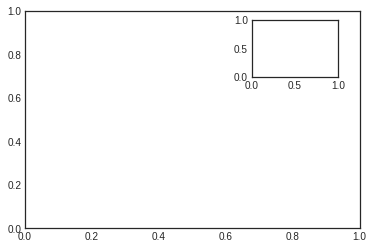

In [3]:
ax1 = plt.axes()  # standard axes
ax2 = plt.axes([0.65, 0.65, 0.2, 0.2]) # creating an inset axes using a list of 4 numbers in the figure coordinate system

Alternatively, we can also use ``fig.add_axes()``. Let's use this to create two vertically stacked axes:

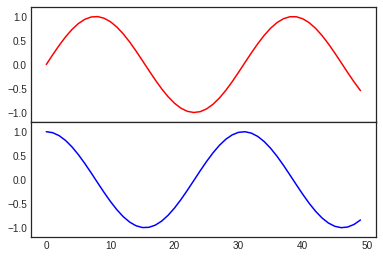

In [14]:
fig = plt.figure()
ax1 = fig.add_axes([0.1, 0.5, 0.8, 0.4],
                   xticklabels=[], ylim=(-1.2, 1.2))
ax2 = fig.add_axes([0.1, 0.1, 0.8, 0.4],
                   ylim=(-1.2, 1.2))

x = np.linspace(0, 10)
ax1.plot(np.sin(x), color = 'red')
ax2.plot(np.cos(x), color = 'blue');

We now have two axes that are just touching: the bottom of the upper panel (at position 0.5) matches the top of the lower panel (at position 0.1 + 0.4).



## ``plt.subplots``: The Whole Grid in One Go

``plt.subplots()``  function creates a full grid of subplots in a single line, returning them in a NumPy array.
The arguments are the number of rows and number of columns, along with optional keywords ``sharex`` and ``sharey``, which allow you to specify the relationships between different axes.

For example, we can create a $2 \times 3$ grid of subplots, where all axes in the same row share their y-axis scale, and all axes in the same column share their x-axis scale:

In [0]:
fig, ax = plt.subplots(2, 3, sharex='col', sharey='row')

We note that specifying ``sharex`` and ``sharey`` automatically removes inner labels on the grid to make the plot cleaner. Also, the resulting grid of axes instances is returned within a NumPy array, allowing for convenient specification of the desired axes using standard array indexing notation. For example,

In [0]:
# axes are in a two-dimensional array, indexed by [row, col].
# we can iterate over it using a nested for loop to insert text at the center of each plot
for i in range(2):
    for j in range(3):
        ax[i, j].text(0.5, 0.5, str((i, j)),
                      fontsize=18, ha='center')
fig

# Customizing Matplotlib: Stylesheets

## Stylesheets

The version 1.4 release of Matplotlib in August 2014 added a very convenient ``style`` module, which includes a number of new default stylesheets, as well as the ability to create and package your own styles.  The stylesheets included by default are extremely useful. The available styles are listed in ``plt.style.available``:

In [0]:
plt.style.available

Let's create a function called hist_and_lines that will make two basic types of plot:

In [0]:
def hist_and_lines():
    np.random.seed(0)
    fig, ax = plt.subplots(1, 2, figsize=(11, 4))
    ax[0].hist(np.random.randn(1000))
    for i in range(3):
        ax[1].plot(np.random.rand(10))
    ax[1].legend(['a', 'b', 'c'], loc='lower left')

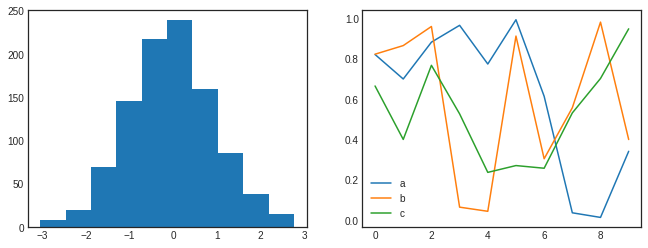

In [23]:
# this is how these two plots would look with default settings in Matplotlib
hist_and_lines()

### FiveThiryEight style

The ``fivethirtyeight`` style mimics the graphics found on the popular [FiveThirtyEight website](https://fivethirtyeight.com).
Plots have bold colors, thick lines, and transparent axes:

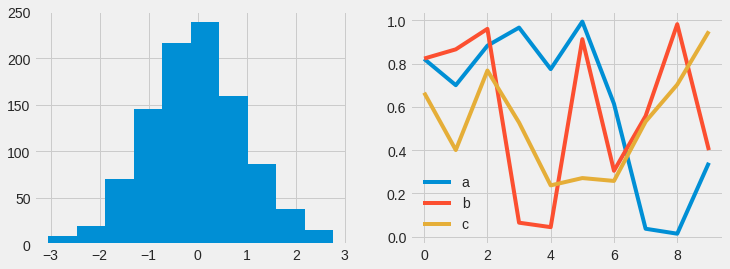

In [25]:
# using the style context manager sets a style temporarily in our notebook.
with plt.style.context('fivethirtyeight'):
    hist_and_lines()

### ggplot

The ``ggplot`` package in the R language is a very popular visualization tool.
Matplotlib's ``ggplot`` style mimics the default styles from that package:

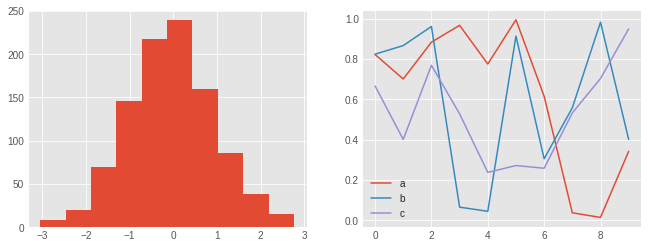

In [26]:
with plt.style.context('ggplot'):
    hist_and_lines()

### Seaborn style

Matplotlib also has stylesheets inspired by the Seaborn library. We are going to cover this library next.
As we will see, these styles are loaded automatically when Seaborn is imported into a notebook.


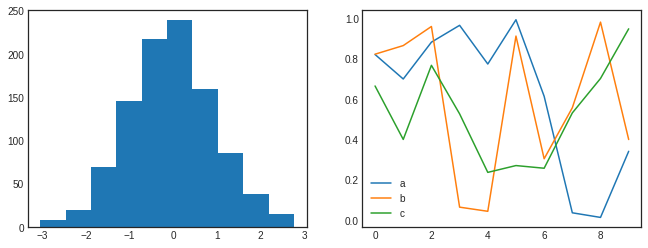

In [27]:
import seaborn
hist_and_lines()

# Visualization with Seaborn Library


[Seaborn](http://seaborn.pydata.org/) is a plotting library in Python that can intelligently use the ``DataFrame`` labels in a plot. Seaborn provides an API on top of Matplotlib that offers sane choices for plot style and color defaults, defines simple high-level functions for common statistical plot types, and integrates with the functionality provided by Pandas ``DataFrame``s. By convention, Seaborn is imported as ``sns`` and we can set the style by calling Seaborn's ``set()`` method:


In [0]:
import seaborn as sns
sns.set()

## Exploring Seaborn Plots

The main idea of Seaborn is that it provides high-level commands to create a variety of plot types useful for statistical data exploration, and even some statistical model fitting.

Let's take a look at a few of the datasets and plot types available in Seaborn. Note that all of the following *could* be done using raw Matplotlib commands (this is, in fact, what Seaborn does under the hood) but the Seaborn API is much more convenient.

### Histograms and densities

Often in statistical data visualization, all you want is to plot histograms and joint distributions of variables.
We have seen that this is relatively straightforward in Matplotlib:

In [0]:
# let us import our boiler plate
import matplotlib.pyplot as plt
plt.style.use('classic')
%matplotlib inline
import numpy as np
import pandas as pd

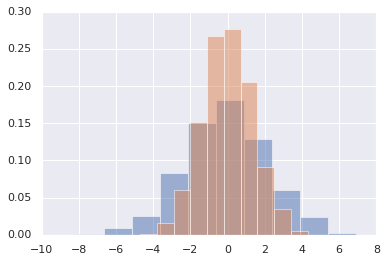

In [35]:
# let us create some normally distributed data and insert into a DataFrame
data = np.random.multivariate_normal([0, 0], [[5, 2], [2, 2]], size=2000)
data = pd.DataFrame(data, columns=['x', 'y'])

for col in 'xy':
    plt.hist(data[col], density=True, alpha=0.5)

Rather than a histogram, we can get a smooth estimate of the distribution using a kernel density estimation, which Seaborn does with ``sns.kdeplot``:

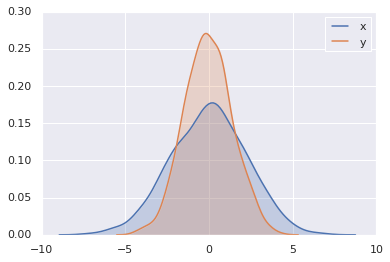

In [34]:
for col in 'xy':
    sns.kdeplot(data[col], shade=True)

Histograms and KDE (Kerned Density Estimation) can be combined using ``distplot``:

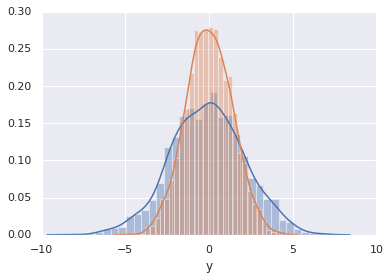

In [36]:
sns.distplot(data['x'])
sns.distplot(data['y']);

### Pair plots

When you generalize joint plots to datasets of larger dimensions, you end up with *pair plots*. This is very useful for exploring correlations between multidimensional data, when you'd like to plot all pairs of values against each other. Let us demo pair plots with the well-known Iris dataset (https://en.wikipedia.org/wiki/Iris_flower_data_set), which lists measurements of petals and sepals of three iris species:

In [37]:
iris = sns.load_dataset("iris")
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


Visualizing the multidimensional relationships among the samples is as easy as calling ``sns.pairplot``:

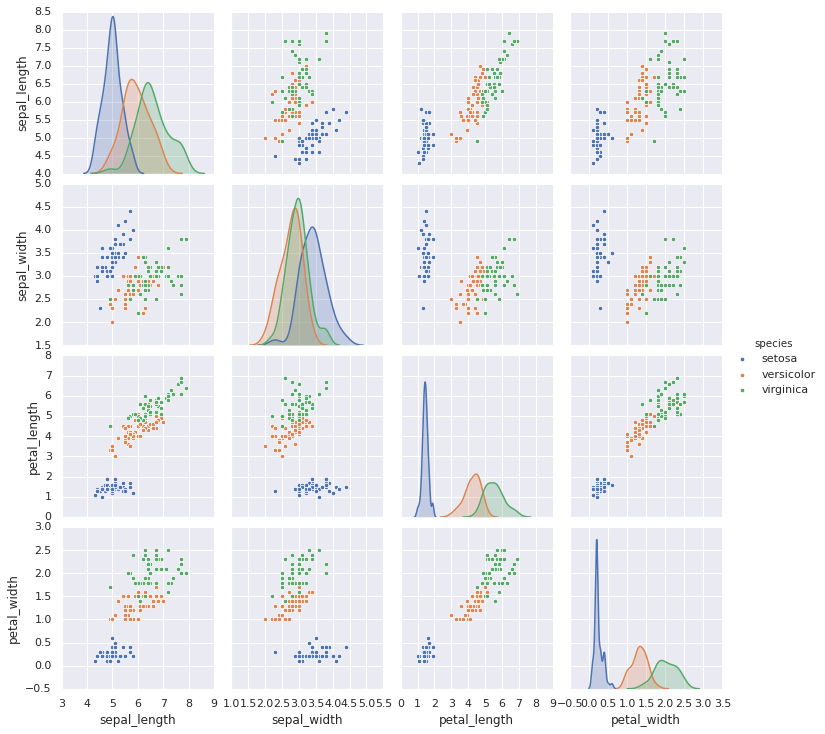

In [39]:
sns.pairplot(iris, hue='species', height=2.5);

### Faceted histograms

Sometimes the best way to view data is via histograms of subsets. Seaborn's ``FacetGrid`` makes this extremely simple. Let us take a look at tips data set in Seaborn (https://www.kaggle.com/ranjeetjain3/seaborn-tips-dataset) that shows
the amount that restaurant staff receive in tips based on various indicator data:

In [40]:
tips = sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [0]:
# let us create a new column tips_pct for tip percentage on a total bill
tips['tip_pct'] = 100 * tips['tip'] / tips['total_bill']

# create grids and mpa the histograms on grids
grid = sns.FacetGrid(tips, row="sex", col="time", margin_titles=True)
grid.map(plt.hist, "tip_pct", bins=np.linspace(0, 40, 15));

### Cat plots

Cat plots can be useful for this kind of visualization (subsets visualization) as well. This allows you to view the distribution of a parameter within bins defined by any other parameter:

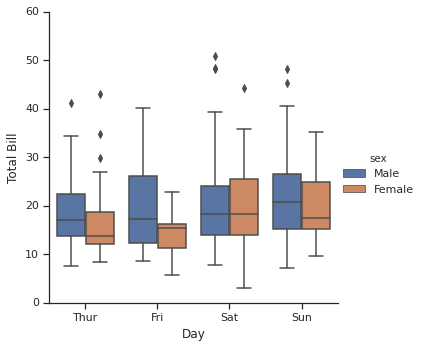

In [55]:
with sns.axes_style(style='ticks'):
    g = sns.catplot("day", "total_bill", "sex" , data=tips, kind="box")
    g.set_axis_labels("Day", "Total Bill");

### Joint distributions

Similar to the pairplot we saw earlier, we can use ``sns.jointplot`` to show the joint distribution between different datasets, along with the associated marginal distributions:

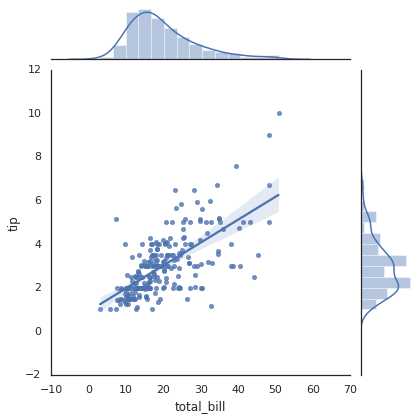

In [59]:
with sns.axes_style('white'):
    sns.jointplot("total_bill", "tip", data=tips, kind='reg')

### Bar plots

Time series can be plotted using ``sns.catplot``. Let us use the Planets data in Seaborn (https://github.com/mwaskom/seaborn-data/blob/master/planets.csv)  to illustrate this:

In [61]:
planets = sns.load_dataset('planets')
planets.head()

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300,7.10,77.40,2006
1,Radial Velocity,1,874.774,2.21,56.95,2008
2,Radial Velocity,1,763.000,2.60,19.84,2011
3,Radial Velocity,1,326.030,19.40,110.62,2007
4,Radial Velocity,1,516.220,10.50,119.47,2009


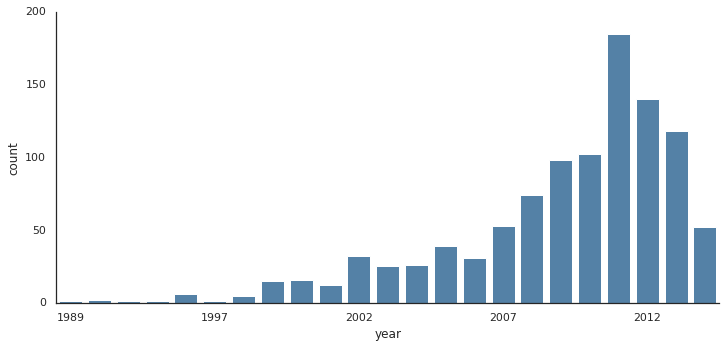

In [63]:
with sns.axes_style('white'):
    g = sns.catplot("year", data=planets, aspect=2,
                       kind="count", color='steelblue')
    g.set_xticklabels(step=5)

We can learn more by looking at the *method* of discovery of each of these planets:

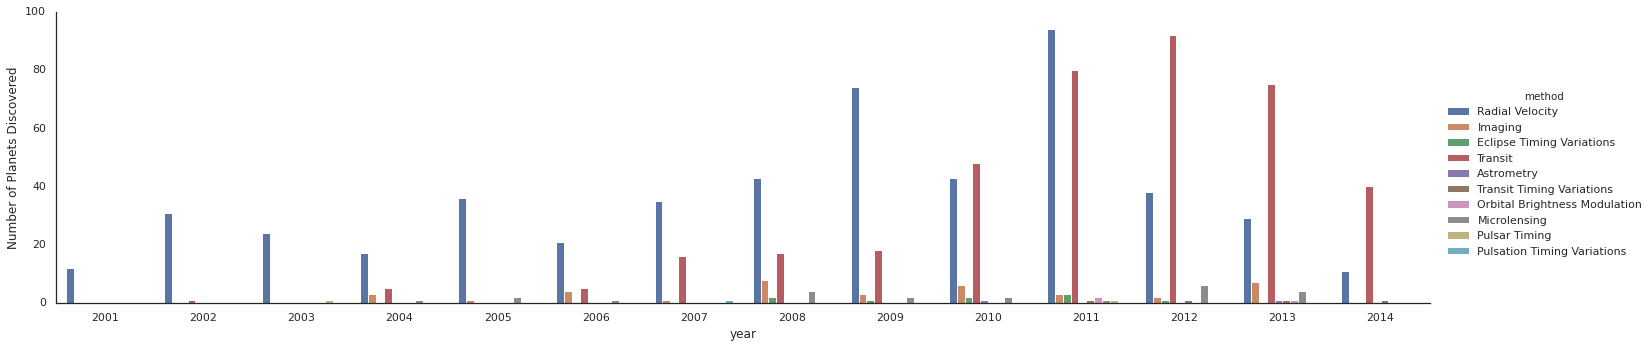

In [64]:
with sns.axes_style('white'):
    g = sns.catplot("year", data=planets, aspect=4.0, kind='count',
                       hue='method', order=range(2001, 2015))
    g.set_ylabels('Number of Planets Discovered')

For more information on plotting with Seaborn, see the [Seaborn documentation](http://seaborn.pydata.org/), a [tutorial](http://seaborn.pydata.org/
tutorial.htm), and the [Seaborn gallery](http://seaborn.pydata.org/examples/index.html).

## Hands on Practice: Exploring Marathon Finishing Times

Let us look at using Seaborn to help visualize and understand finishing results from a marathon. The scraped data is located at https://raw.githubusercontent.com/jakevdp/marathon-data/master/marathon-data.csv.

We will start by downloading the data from
the Web, and loading it into Pandas:

In [65]:
data_url_link = 'https://raw.githubusercontent.com/jakevdp/marathon-data/master/marathon-data.csv'
data = pd.read_csv(data_url_link)
data.head()

,age,gender,split,final
0,33,M,01:05:38,02:08:51
1,32,M,01:06:26,02:09:28
2,31,M,01:06:49,02:10:42
3,38,M,01:06:16,02:13:45
4,31,M,01:06:32,02:13:59


By default, Pandas loaded the time columns (split and final) as Python strings (type ``object``); we can see this by looking at the ``dtypes`` attribute of the DataFrame:

In [66]:
data.dtypes

age        int64
gender    object
split     object
final     object
dtype: object

Let's fix this by providing a converter for the times using datatime library in Python:

In [67]:
import datetime

def convert_time(s):
    h, m, s = map(int, s.split(':'))
    return datetime.timedelta(hours=h, minutes=m, seconds=s)

data = pd.read_csv(data_url_link,
                   converters={'split':convert_time, 'final':convert_time})
data.head()

,age,gender,split,final
0,33,M,01:05:38,02:08:51
1,32,M,01:06:26,02:09:28
2,31,M,01:06:49,02:10:42
3,38,M,01:06:16,02:13:45
4,31,M,01:06:32,02:13:59


 Let us next add columns that give the times in seconds:

In [70]:
data['split_sec'] = data['split'].astype(int) / 1E9
data['final_sec'] = data['final'].astype(int) / 1E9
data.head()

,age,gender,split,final,split_sec,final_sec
0,33,M,01:05:38,02:08:51,3938.0,7731.0
1,32,M,01:06:26,02:09:28,3986.0,7768.0
2,31,M,01:06:49,02:10:42,4009.0,7842.0
3,38,M,01:06:16,02:13:45,3976.0,8025.0
4,31,M,01:06:32,02:13:59,3992.0,8039.0


To get an idea of what the data looks like, we can plot a ``jointplot`` over the data:

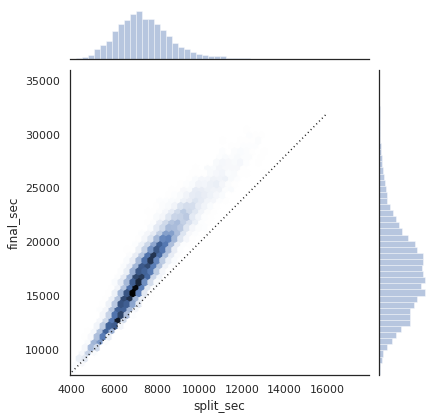

In [74]:
with sns.axes_style('white'):
    g = sns.jointplot("split_sec", "final_sec", data, kind='hex')
    g.ax_joint.plot(np.linspace(4000, 16000),
                    np.linspace(8000, 32000), ':k')

The dotted line shows where someone's time would lie if they ran the marathon at a perfectly steady pace. The fact that the distribution lies above this indicates (as you might expect) that most people slow down over the course of the marathon.Runners who run faster during the second half of the race are said to have "negative-split" the race.

Let us create another column in the data, the split fraction, which measures the degree to which each runner negative-splits or positive-splits the race:

In [75]:
data['split_frac'] = 1 - 2 * data['split_sec'] / data['final_sec']
data.head()

,age,gender,split,final,split_sec,final_sec,split_frac
0,33,M,01:05:38,02:08:51,3938.0,7731.0,-0.018756
1,32,M,01:06:26,02:09:28,3986.0,7768.0,-0.026262
2,31,M,01:06:49,02:10:42,4009.0,7842.0,-0.022443
3,38,M,01:06:16,02:13:45,3976.0,8025.0,0.009097
4,31,M,01:06:32,02:13:59,3992.0,8039.0,0.006842


Let us plot the distribution of this split fraction:

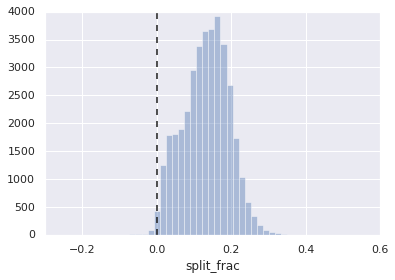

In [76]:
sns.distplot(data['split_frac'], kde=False);
plt.axvline(0, color="k", linestyle="--"); # adding a vertical line to show below and above zero

In [77]:
sum(data.split_frac < 0)

251

Out of nearly 40,000 participants, there were only 251 people who negative-split their marathon. Let's see whether there is any correlation between this split fraction and other variables. We'll do this using a ``pairgrid``, which draws plots of all these correlations:

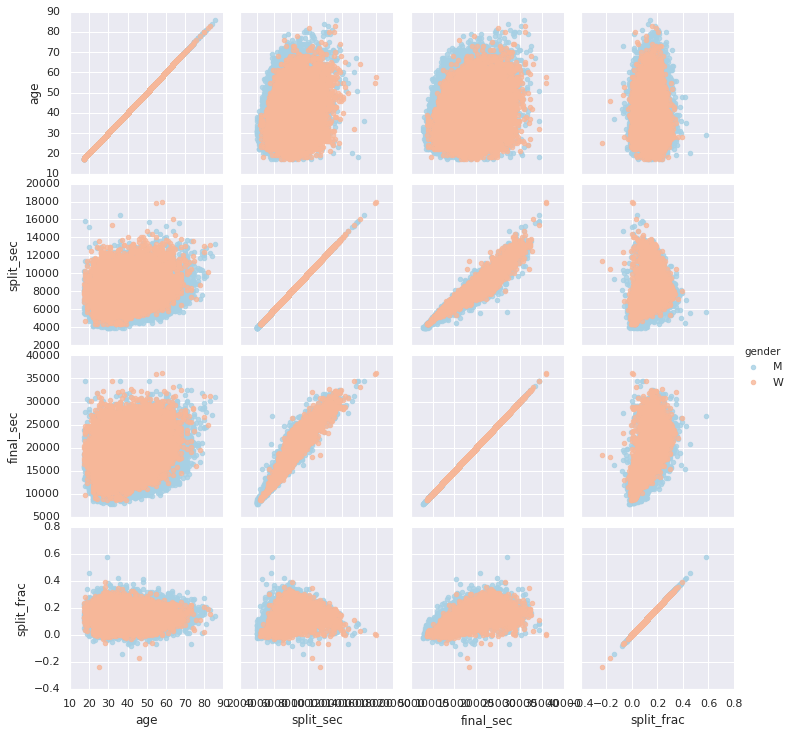

In [83]:
g = sns.PairGrid(data, vars=['age', 'split_sec', 'final_sec', 'split_frac'],
                 hue='gender',  palette='RdBu_r') # create grids
g.map(plt.scatter, alpha=0.8) # map scatter plots on grids
g.add_legend();

It looks like the split fraction does not correlate particularly with age, but does correlate with the final time: faster runners tend to have closer to even splits on their marathon time.



The difference between men and women here is interesting. Let us look at the histogram of split fractions for these two groups:

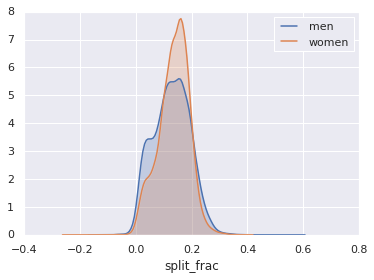

In [86]:
sns.kdeplot(data.split_frac[data.gender=='M'], label='men', shade=True)
sns.kdeplot(data.split_frac[data.gender=='W'], label='women', shade=True)
plt.xlabel('split_frac');

The interesting thing here is that there are many more men than women who are running close to an even split!

This almost looks like some kind of bimodal distribution (https://www.statisticshowto.datasciencecentral.com/what-is-a-bimodal-distribution/)  among the men and women. Let's see if we can discover what's going on by looking at the distributions as a function of age.




A nice way to compare distributions is to use a *violin plot* in Seaborn library.

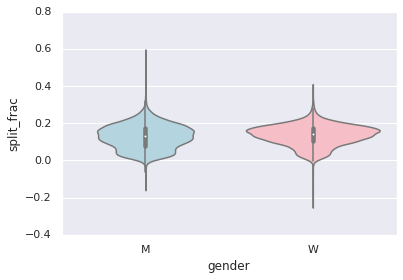

In [87]:
sns.violinplot("gender", "split_frac", data=data,
               palette=["lightblue", "lightpink"]);

These violin plots enable us to compare the distributions between men and women. Let's look a little deeper, and compare these violin plots as a function of age. We'll start by creating a new column in the array that specifies the decade of age that each person is in:

In [88]:
# we can use map function along with lambda to create age_dec column in our DataFrame
data['age_dec'] = data.age.map(lambda age: 10 * (age // 10))
data.head()

,age,gender,split,final,split_sec,final_sec,split_frac,age_dec
0,33,M,01:05:38,02:08:51,3938.0,7731.0,-0.018756,30
1,32,M,01:06:26,02:09:28,3986.0,7768.0,-0.026262,30
2,31,M,01:06:49,02:10:42,4009.0,7842.0,-0.022443,30
3,38,M,01:06:16,02:13:45,3976.0,8025.0,0.009097,30
4,31,M,01:06:32,02:13:59,3992.0,8039.0,0.006842,30


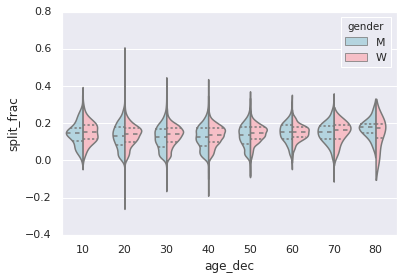

In [91]:
men = (data.gender == 'M')
women = (data.gender == 'W')

with sns.axes_style(style=None):
    sns.violinplot("age_dec", "split_frac", hue="gender", data=data,
                   split=True, inner="quartile",
                   palette=["lightblue", "lightpink"]);

Looking at this, we can see where the distributions of men and women differ: the split distributions of men in their 20s to 50s show a pronounced over-density toward lower splits when compared to women of the same age (or of any age, for that matter).

Also surprisingly, the 80-year-old women seem to outperform *everyone* in terms of their split time. This is probably due to the fact that we're estimating the distribution from small numbers, as there are only a small number of runners in that range:

In [92]:
(data.age > 80).sum()

7

Back to the men with negative splits: who are these runners? Does this split fraction correlate with finishing quickly? We can plot this very easily using lmplot in Seaborn, which automatically fits a linear regression to the data:

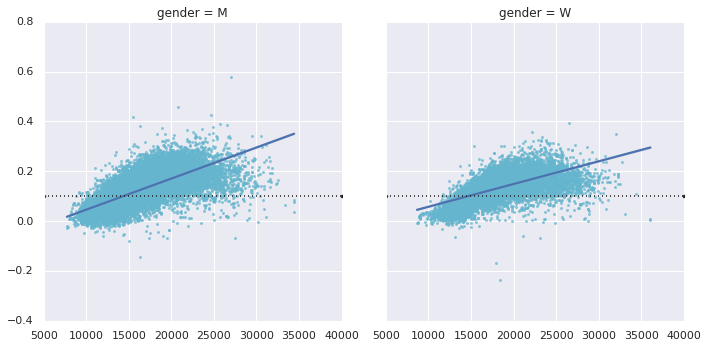

In [98]:
g = sns.lmplot('final_sec', 'split_frac', col='gender', data=data,
               markers=".", scatter_kws=dict(color='c'))
g.map(plt.axhline, y=0.1, color="k", ls=":");

This chart tells us that runners with fast splits are also the elite runners who are finishing within ~15,000 seconds, or about 4 hours. Runners who are slower than that are much less likely to have a fast second split.